In [1]:
import torch
import numpy
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

from model.net import *
from utils.training import *
from data.data import *

## Experiment Config

In [6]:
model_path = os.getcwd()

args = {
    'USE_CUDA': True if torch.cuda.is_available() else False,
    'BATCH_SIZE': 256,
    'N_EPOCHS': 30,
    'LEARNING_RATE_1': 1e-2,
    'LEARNING_RATE_2': 1e-2,
    'MOMENTUM': 0.9,
    'DATASET_NAME':'mnist',
    'LAMBDA_recon': 1,
    'LAMBDA_margin': 1,
    'LReLU_negative_slope':0.1,
    'WEIGHTDECAY':5e-5,
}

## Model Loading

In [7]:
# Config for 16 1d vectors in Capsule Layer. Set the Softmax Dimension to 1 in this case
class Config:
    def __init__(self, dataset='mnist'):
        # CNN (cnn)
        self.cnn_in_channels = 1
        self.cnn_out_channels = 12
        self.cnn_kernel_size = 15

        # Primary Capsule (pc)
        self.pc_num_capsules = 1
        self.pc_in_channels = 12
        self.pc_out_channels = 16
        self.pc_kernel_size = 8
        self.pc_num_routes = 1 * 7 * 7

        # Digit Capsule 1 (dc)
        self.dc_num_capsules = 49
        self.dc_num_routes = 7 * 7 #7*7*16
        self.dc_in_channels = 16
        self.dc_out_channels = 16 #1
        
        # Digit Capsule 2 (dc)
        self.dc_2_num_capsules = 10
        self.dc_2_num_routes = 7 * 7
        self.dc_2_in_channels = 16 #1
        self.dc_2_out_channels = 16

        # Decoder
        self.input_width = 28
        self.input_height = 28

torch.manual_seed(2)
config = Config()

net = CapsNet(args, config)


# net = torch.nn.DataParallel(net)


    
# net.load_state_dict(torch.load(os.path.join(model_path, 'CapsNetMNIST_Recon.pth'), map_location='cpu'))

# net.decoder.reconstraction_layers = nn.Sequential(
#             nn.Linear(16 * 10, 512),
#             nn.LeakyReLU(negative_slope=args['LReLU_negative_slope'], inplace=True),
#             nn.Linear(512, 1024),
#             nn.LeakyReLU(negative_slope=args['LReLU_negative_slope'], inplace=True),
#             nn.Linear(1024, 784),
#             nn.Sigmoid()
#         )

# # # # freeze All layers except Decoder
# to_freeze = [net.conv_layer, net.primary_capsules, net.digit_capsules_1, net.digit_capsules_2]
# for layer in to_freeze:
#     for param in layer.parameters():
#         param.requires_grad = False
#     layer.eval()
    
if args['USE_CUDA']:
    net = net.cuda()
    

## Loading Dataset

In [8]:
trainloader, testloader = dataset(args)

In [9]:
# for param in net.parameters():
#     if(param.requires_grad==True):
#         print(param.shape)
        
for data in trainloader:
    print(data[0].max())
    print(data[0].min())
    break
filter(lambda p: p.requires_grad, net.parameters())

tensor(2.8215)
tensor(-0.4242)


## Training CapsuleNet

  0%|          | 0/235 [00:00<?, ?it/s]

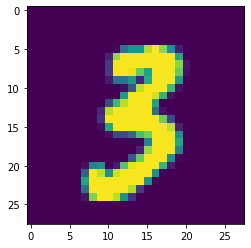

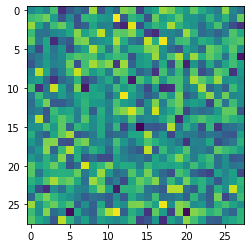

tensor([ 0.0246,  0.0178, -0.0438], device='cuda:0', grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:01<05:47,  1.48s/it]

tensor([ 0.0147,  0.0079, -0.0338], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 1.3503e-11,  1.4337e-11, -1.6783e-10], device='cuda:0')
Epoch: [1/30], Batch: [1/235], train accuracy: 0.093750, loss: 0.008386


 43%|████▎     | 100/235 [00:55<01:16,  1.77it/s]

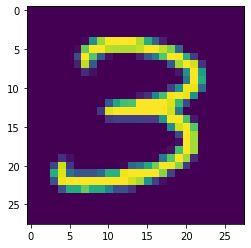

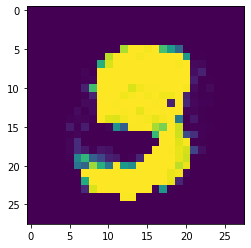

tensor([0.0007, 0.0003, 0.0006], device='cuda:0', grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:56<01:25,  1.56it/s]

tensor([0.0008, 0.0007, 0.0003], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([-1.0700e-08,  1.5605e-08, -5.2480e-09], device='cuda:0')
Epoch: [1/30], Batch: [101/235], train accuracy: 0.722656, loss: 0.004412


 85%|████████▌ | 200/235 [01:52<00:19,  1.77it/s]

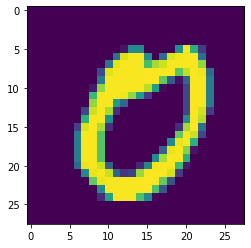

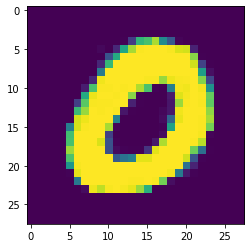

tensor([-7.8376e-06,  2.1703e-04, -2.9640e-04], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:53<00:21,  1.60it/s]

tensor([ 3.6828e-05,  7.9110e-05, -2.2253e-04], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-1.0344e-08,  3.1141e-08, -2.8000e-09], device='cuda:0')
Epoch: [1/30], Batch: [201/235], train accuracy: 0.925781, loss: 0.003297


100%|██████████| 235/235 [02:12<00:00,  1.78it/s]

Epoch: [1/30], train loss: 0.004435



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [1/30], test accuracy: 0.954800, loss: 0.804963


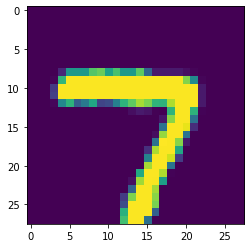

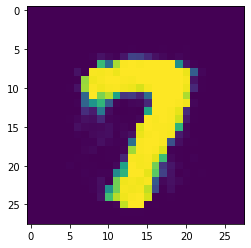

tensor([ 0.0003, -0.0002,  0.0001], device='cuda:0', grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:29,  1.12it/s]

tensor([6.3190e-05, 3.1948e-04, 1.0459e-04], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-9.5850e-10,  3.4753e-09, -3.2343e-10], device='cuda:0')
Epoch: [2/30], Batch: [1/235], train accuracy: 0.964844, loss: 0.003121


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

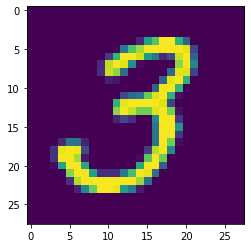

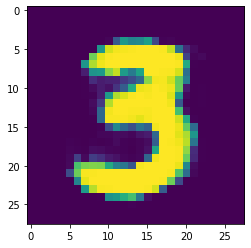

tensor([-1.9437e-04,  3.4107e-04, -4.5010e-05], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:23,  1.60it/s]

tensor([-0.0003,  0.0004, -0.0001], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 1.3855e-08, -1.7189e-08,  8.1358e-09], device='cuda:0')
Epoch: [2/30], Batch: [101/235], train accuracy: 0.964844, loss: 0.003028


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

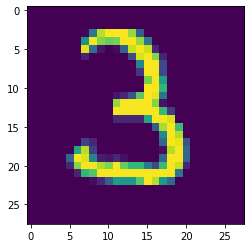

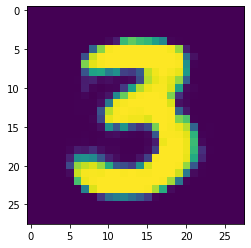

tensor([-0.0004,  0.0012, -0.0003], device='cuda:0', grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([-0.0006,  0.0014, -0.0009], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 1.2209e-07, -1.5629e-07,  6.5268e-08], device='cuda:0')
Epoch: [2/30], Batch: [201/235], train accuracy: 0.972656, loss: 0.002823


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [2/30], train loss: 0.003005



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [2/30], test accuracy: 0.975400, loss: 0.741307


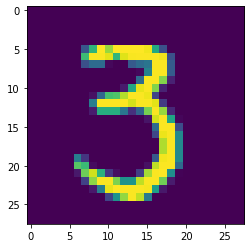

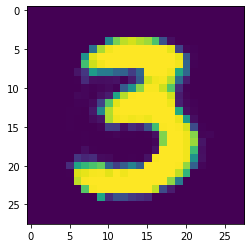

tensor([-2.3789e-05,  9.9968e-05, -1.1638e-04], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:27,  1.13it/s]

tensor([ 5.5877e-07, -3.6764e-05, -1.3669e-04], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-2.2025e-09,  1.8161e-09,  2.5305e-09], device='cuda:0')
Epoch: [3/30], Batch: [1/235], train accuracy: 0.964844, loss: 0.002885


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

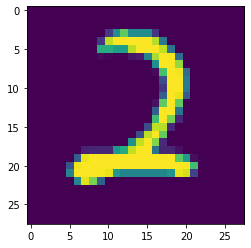

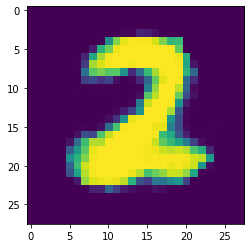

tensor([ 1.4887e-05, -5.9841e-05,  1.8875e-06], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:26,  1.55it/s]

tensor([-4.5545e-06, -4.8247e-05,  7.3697e-08], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 7.0538e-10, -9.1248e-10,  5.6729e-10], device='cuda:0')
Epoch: [3/30], Batch: [101/235], train accuracy: 0.984375, loss: 0.002791


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

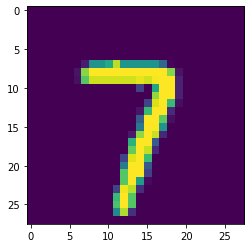

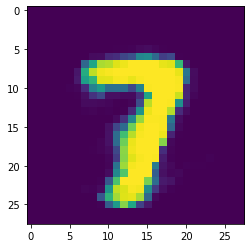

tensor([ 1.5083e-06, -8.9376e-07,  6.2093e-07], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([ 1.1819e-06, -9.6291e-07, -1.5526e-07], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 3.4787e-12,  6.3013e-12, -9.8380e-12], device='cuda:0')
Epoch: [3/30], Batch: [201/235], train accuracy: 0.980469, loss: 0.002874


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [3/30], train loss: 0.002855



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [3/30], test accuracy: 0.973500, loss: 0.728378


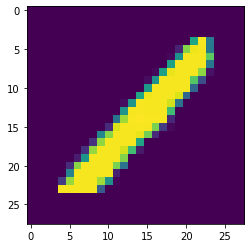

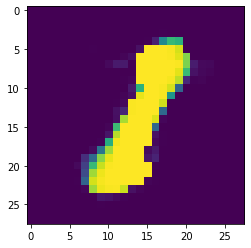

tensor([2.9561e-07, 2.1942e-07, 3.8459e-07], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:39,  1.07it/s]

tensor([ 5.2657e-07, -7.5438e-08,  6.7011e-07], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-3.2654e-12,  3.6651e-12, -1.2843e-12], device='cuda:0')
Epoch: [4/30], Batch: [1/235], train accuracy: 0.972656, loss: 0.002784


 43%|████▎     | 100/235 [00:57<01:16,  1.76it/s]

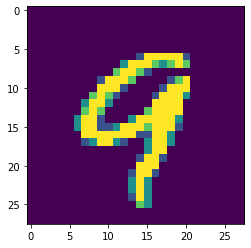

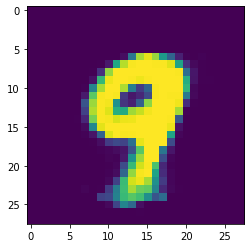

tensor([ 1.6065e-05, -1.7171e-05,  5.8332e-06], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([ 1.4263e-05, -1.6120e-05,  3.0847e-06], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 3.0652e-10, -4.0644e-10,  3.8593e-10], device='cuda:0')
Epoch: [4/30], Batch: [101/235], train accuracy: 0.980469, loss: 0.002675


 85%|████████▌ | 200/235 [01:54<00:19,  1.76it/s]

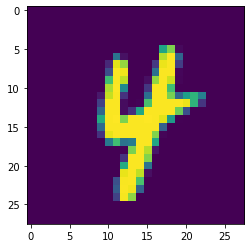

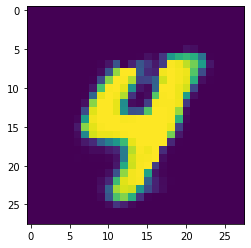

tensor([-0.0212,  0.0120, -0.0253], device='cuda:0', grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([-0.0230,  0.0148, -0.0232], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 4.2038e-07, -5.7418e-07,  4.0764e-07], device='cuda:0')
Epoch: [4/30], Batch: [201/235], train accuracy: 0.984375, loss: 0.002672


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [4/30], train loss: 0.002737



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [4/30], test accuracy: 0.982100, loss: 0.693694


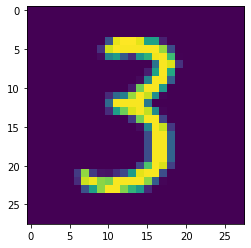

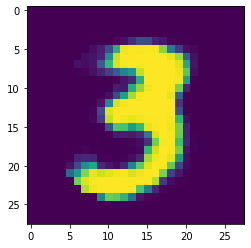

tensor([ 0.0063, -0.0041,  0.0016], device='cuda:0', grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:40,  1.06it/s]

tensor([ 0.0063, -0.0045,  0.0010], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([-1.7537e-08,  3.0825e-08, -2.6582e-08], device='cuda:0')
Epoch: [5/30], Batch: [1/235], train accuracy: 0.988281, loss: 0.002635


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

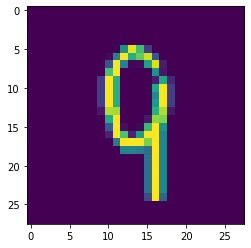

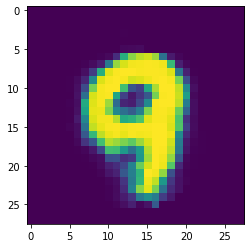

tensor([-4.1272e-05,  3.8407e-05, -4.6279e-05], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([-3.9494e-05,  4.0570e-05, -4.7737e-05], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-2.0860e-09,  1.9408e-09, -3.7749e-10], device='cuda:0')
Epoch: [5/30], Batch: [101/235], train accuracy: 0.976562, loss: 0.002687


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

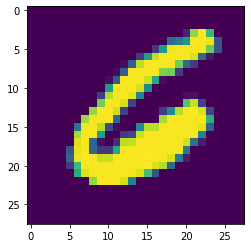

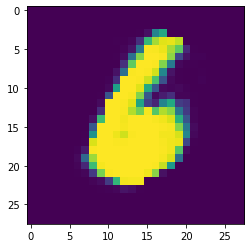

tensor([-6.9729e-07,  7.0680e-07, -5.8690e-07], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([-6.0650e-07,  6.6918e-07, -6.2927e-07], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 4.9956e-11, -6.5866e-11,  4.5490e-11], device='cuda:0')
Epoch: [5/30], Batch: [201/235], train accuracy: 0.968750, loss: 0.002727


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [5/30], train loss: 0.002663



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [5/30], test accuracy: 0.984000, loss: 0.682339


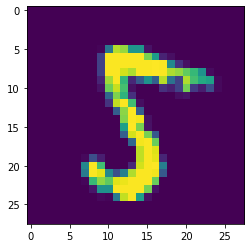

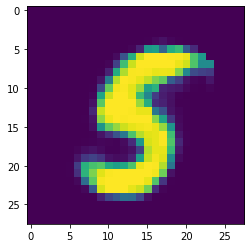

tensor([-2.2960e-07,  6.3052e-08, -2.3633e-08], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:28,  1.12it/s]

tensor([-2.7606e-07,  1.1383e-07, -1.0040e-07], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 4.6927e-11, -5.1286e-11,  2.4726e-11], device='cuda:0')
Epoch: [6/30], Batch: [1/235], train accuracy: 0.984375, loss: 0.002578


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

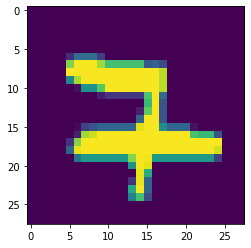

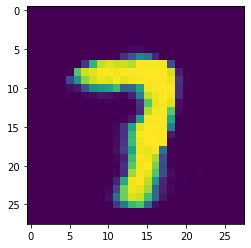

tensor([-8.0519e-09,  8.6065e-09, -9.6460e-09], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([-7.5877e-09,  8.0802e-09, -8.1553e-09], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-5.5706e-13,  4.0985e-13,  8.8088e-14], device='cuda:0')
Epoch: [6/30], Batch: [101/235], train accuracy: 0.992188, loss: 0.002568


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

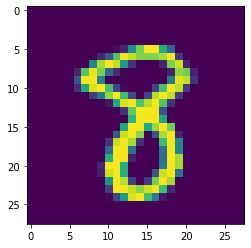

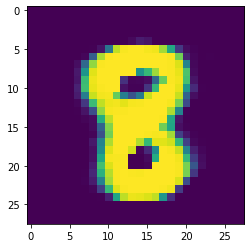

tensor([ 5.8365e-11, -1.0340e-11,  1.5357e-10], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([ 4.8809e-11, -3.0232e-12,  1.4695e-10], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-3.9954e-15,  5.8712e-15, -4.2453e-15], device='cuda:0')
Epoch: [6/30], Batch: [201/235], train accuracy: 0.984375, loss: 0.002573


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [6/30], train loss: 0.002616



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [6/30], test accuracy: 0.983200, loss: 0.676862


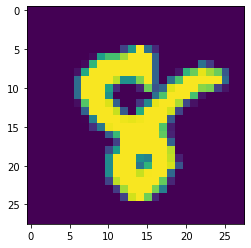

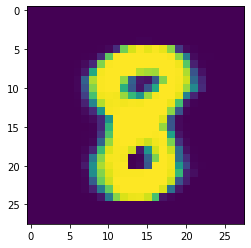

tensor([ 9.6259e-11, -1.0466e-10,  8.2776e-11], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:40,  1.06it/s]

tensor([ 9.7534e-11, -1.0793e-10,  8.4720e-11], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 9.2035e-15, -1.1035e-14,  2.7782e-15], device='cuda:0')
Epoch: [7/30], Batch: [1/235], train accuracy: 0.976562, loss: 0.002699


 43%|████▎     | 100/235 [00:56<01:16,  1.76it/s]

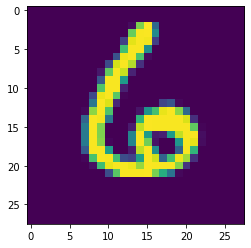

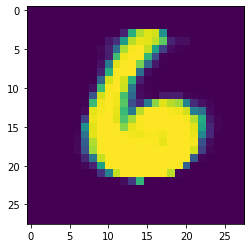

tensor([-3.5491e-05,  3.1023e-05,  2.3172e-04], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([ 0.0002, -0.0003,  0.0008], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([-9.1414e-09,  3.7274e-09, -1.1877e-08], device='cuda:0')
Epoch: [7/30], Batch: [101/235], train accuracy: 1.000000, loss: 0.002471


 85%|████████▌ | 200/235 [01:53<00:19,  1.76it/s]

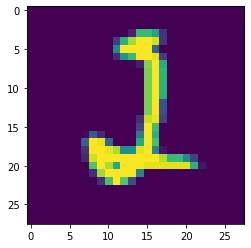

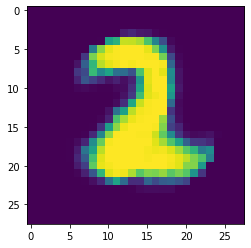

tensor([ 0.0221, -0.0121, -0.0328], device='cuda:0', grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([ 0.0272, -0.0158, -0.0280], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 2.0299e-07, -3.0892e-07,  6.6226e-07], device='cuda:0')
Epoch: [7/30], Batch: [201/235], train accuracy: 0.996094, loss: 0.002527


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [7/30], train loss: 0.002575



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [7/30], test accuracy: 0.983900, loss: 0.663768


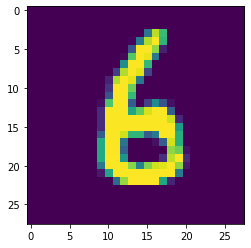

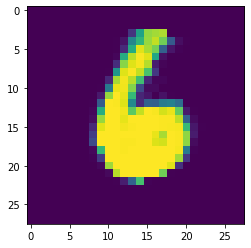

tensor([-0.0132,  0.0035, -0.0025], device='cuda:0', grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:28,  1.12it/s]

tensor([-0.0115,  0.0036, -0.0034], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([-5.2541e-07,  5.3562e-07, -2.6851e-07], device='cuda:0')
Epoch: [8/30], Batch: [1/235], train accuracy: 0.984375, loss: 0.002498


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

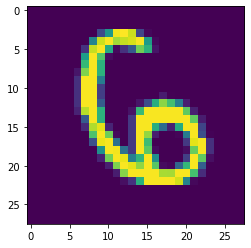

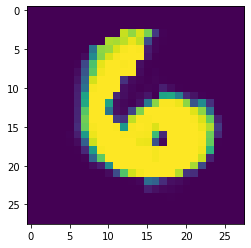

tensor([-6.4889e-05, -2.2587e-05, -3.2941e-05], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([-4.8784e-05, -1.7204e-05, -4.4932e-05], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-1.1924e-09,  1.3698e-11,  1.4362e-09], device='cuda:0')
Epoch: [8/30], Batch: [101/235], train accuracy: 0.996094, loss: 0.002512


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

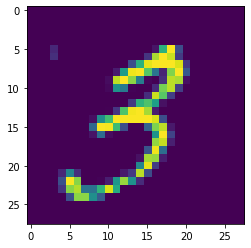

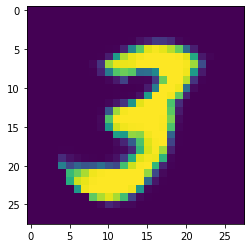

tensor([ 4.1015e-06,  3.5316e-07, -1.6319e-05], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([ 3.4495e-06,  7.6542e-07, -1.3943e-05], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-1.5102e-09,  1.9644e-09, -1.2665e-09], device='cuda:0')
Epoch: [8/30], Batch: [201/235], train accuracy: 0.996094, loss: 0.002526


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [8/30], train loss: 0.002543



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [8/30], test accuracy: 0.986700, loss: 0.655508


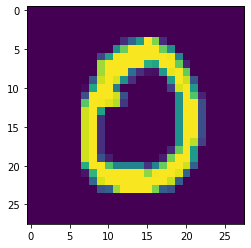

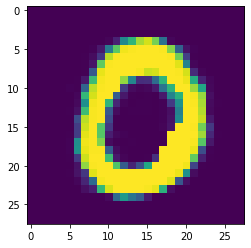

tensor([-9.3173e-06,  4.6691e-06, -3.1793e-06], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:41,  1.06it/s]

tensor([-1.0721e-05,  6.9663e-06, -6.5312e-06], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 1.9643e-09, -2.5392e-09,  1.6697e-09], device='cuda:0')
Epoch: [9/30], Batch: [1/235], train accuracy: 0.996094, loss: 0.002454


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

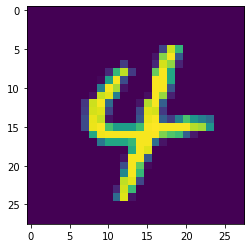

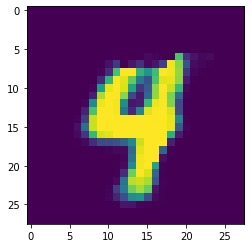

tensor([ 0.0016, -0.0021,  0.0042], device='cuda:0', grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([ 0.0023, -0.0029,  0.0057], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 7.6673e-08, -3.0897e-08, -1.9090e-07], device='cuda:0')
Epoch: [9/30], Batch: [101/235], train accuracy: 0.984375, loss: 0.002560


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

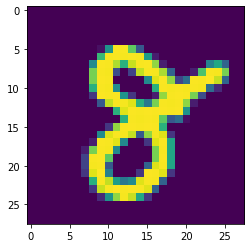

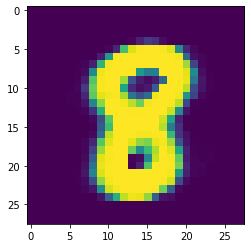

tensor([-0.0059,  0.0027, -0.0003], device='cuda:0', grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([-5.6114e-03,  2.5489e-03,  2.1787e-05], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-2.7940e-07,  3.5827e-07, -3.1467e-07], device='cuda:0')
Epoch: [9/30], Batch: [201/235], train accuracy: 1.000000, loss: 0.002387


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [9/30], train loss: 0.002522



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [9/30], test accuracy: 0.985600, loss: 0.652298


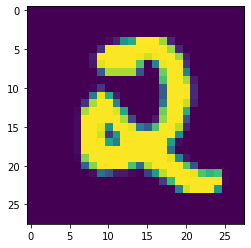

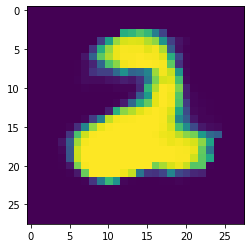

tensor([ 0.0002, -0.0002,  0.0002], device='cuda:0', grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:27,  1.13it/s]

tensor([ 0.0002, -0.0003,  0.0004], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([-6.9929e-08,  1.3526e-07, -8.0136e-08], device='cuda:0')
Epoch: [10/30], Batch: [1/235], train accuracy: 0.988281, loss: 0.002505


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

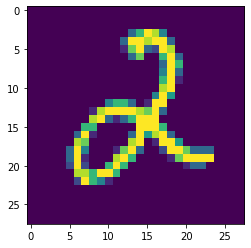

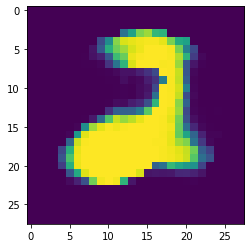

tensor([-6.6609e-05,  3.3209e-05,  1.2084e-04], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([-5.8315e-05,  2.5236e-05,  1.1052e-04], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 6.9060e-10, -3.2318e-09,  2.2739e-09], device='cuda:0')
Epoch: [10/30], Batch: [101/235], train accuracy: 0.992188, loss: 0.002527


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

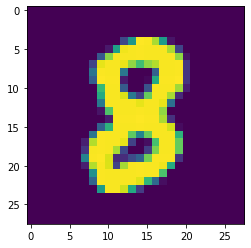

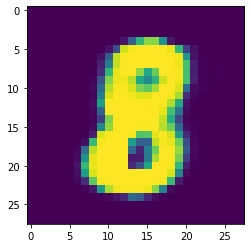

tensor([ 4.9609e-08,  1.8444e-06, -1.0240e-05], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([ 8.1048e-07,  1.5197e-06, -8.6490e-06], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-8.4841e-10,  1.0365e-09, -6.8106e-10], device='cuda:0')
Epoch: [10/30], Batch: [201/235], train accuracy: 0.992188, loss: 0.002523


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [10/30], train loss: 0.002505



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [10/30], test accuracy: 0.985900, loss: 0.649899


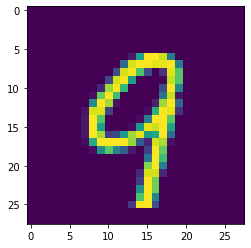

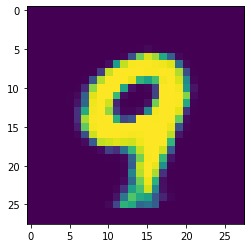

tensor([-3.9115e-06,  3.9521e-06, -6.0961e-06], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:40,  1.06it/s]

tensor([-3.6262e-06,  3.8636e-06, -5.2513e-06], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 1.3001e-10, -9.4834e-11,  2.2471e-11], device='cuda:0')
Epoch: [11/30], Batch: [1/235], train accuracy: 0.992188, loss: 0.002474


 43%|████▎     | 100/235 [00:56<01:15,  1.78it/s]

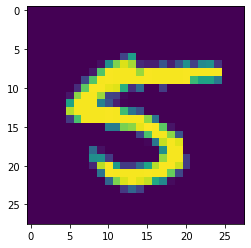

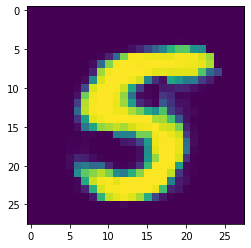

tensor([-7.1687e-07,  8.9504e-07, -8.2955e-07], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:23,  1.60it/s]

tensor([-6.2297e-07,  8.6058e-07, -6.5301e-07], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-8.6690e-11,  1.6356e-10, -1.7698e-10], device='cuda:0')
Epoch: [11/30], Batch: [101/235], train accuracy: 0.992188, loss: 0.002513


 85%|████████▌ | 200/235 [01:53<00:19,  1.78it/s]

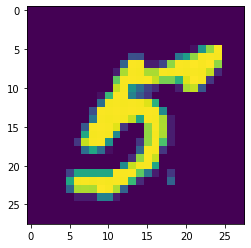

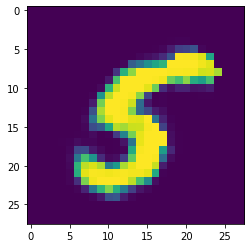

tensor([ 2.0525e-05, -1.6163e-05,  8.5933e-06], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.60it/s]

tensor([ 1.8155e-05, -1.4166e-05,  4.3298e-06], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-1.1594e-09,  3.0631e-10,  4.9507e-10], device='cuda:0')
Epoch: [11/30], Batch: [201/235], train accuracy: 0.992188, loss: 0.002459


100%|██████████| 235/235 [02:12<00:00,  1.77it/s]

Epoch: [11/30], train loss: 0.002490



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [11/30], test accuracy: 0.987500, loss: 0.646991


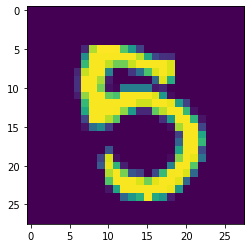

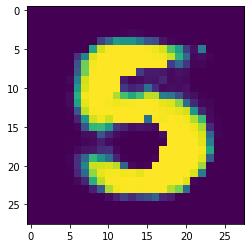

tensor([ 1.2113e-07,  9.8398e-07, -5.2713e-06], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:35,  1.08it/s]

tensor([-5.1524e-09,  1.7282e-06, -6.0641e-06], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 7.1170e-10, -9.8306e-10,  5.4836e-10], device='cuda:0')
Epoch: [12/30], Batch: [1/235], train accuracy: 0.988281, loss: 0.002433


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

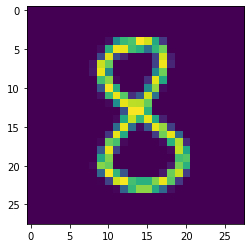

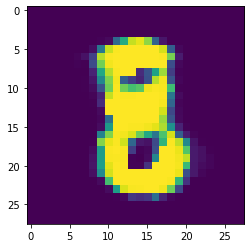

tensor([-9.6166e-06,  6.8181e-05, -1.0539e-04], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([-1.0408e-06,  6.3857e-05, -9.5639e-05], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-9.9465e-09,  1.0459e-08, -5.8301e-09], device='cuda:0')
Epoch: [12/30], Batch: [101/235], train accuracy: 0.988281, loss: 0.002474


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

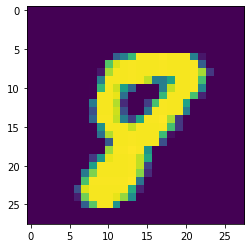

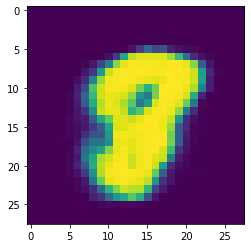

tensor([ 9.6598e-05, -4.1894e-04, -3.2540e-04], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([ 0.0001, -0.0004, -0.0003], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([-1.5013e-09, -9.2011e-09,  9.2054e-09], device='cuda:0')
Epoch: [12/30], Batch: [201/235], train accuracy: 0.996094, loss: 0.002437


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [12/30], train loss: 0.002479



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [12/30], test accuracy: 0.987100, loss: 0.643800


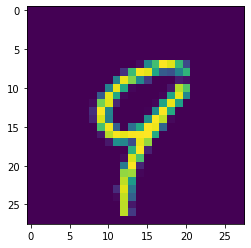

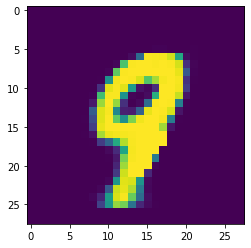

tensor([ 0.0016, -0.0060, -0.0079], device='cuda:0', grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:41,  1.06it/s]

tensor([ 0.0036, -0.0061, -0.0070], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([-2.4869e-06,  1.4422e-06, -7.5050e-07], device='cuda:0')
Epoch: [13/30], Batch: [1/235], train accuracy: 0.996094, loss: 0.002426


 43%|████▎     | 100/235 [00:57<01:16,  1.77it/s]

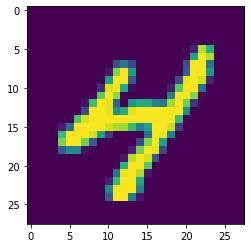

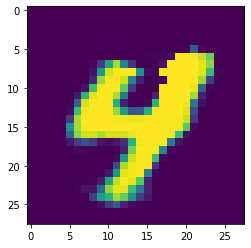

tensor([-0.0008,  0.0005, -0.0006], device='cuda:0', grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([-0.0008,  0.0006, -0.0004], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 2.7822e-08, -2.1238e-08,  9.1262e-09], device='cuda:0')
Epoch: [13/30], Batch: [101/235], train accuracy: 0.996094, loss: 0.002419


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

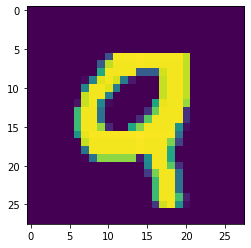

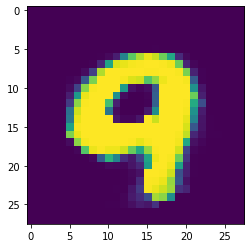

tensor([-2.5308e-05,  2.3256e-05,  2.1103e-05], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([-2.3671e-05,  2.2120e-05,  1.9826e-05], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 3.7441e-10, -6.9866e-10,  7.1047e-10], device='cuda:0')
Epoch: [13/30], Batch: [201/235], train accuracy: 0.976562, loss: 0.002503


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [13/30], train loss: 0.002466



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [13/30], test accuracy: 0.986700, loss: 0.643886


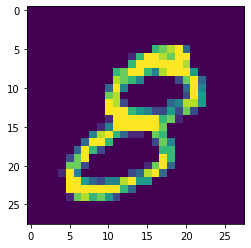

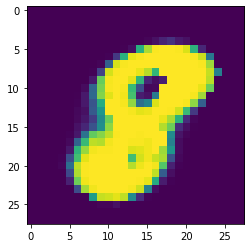

tensor([-6.5509e-06,  5.5157e-06,  9.3027e-07], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:31,  1.11it/s]

tensor([-5.4736e-06,  5.0839e-06,  2.7723e-07], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 9.9134e-11, -1.4098e-10,  1.1365e-10], device='cuda:0')
Epoch: [14/30], Batch: [1/235], train accuracy: 0.992188, loss: 0.002541


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

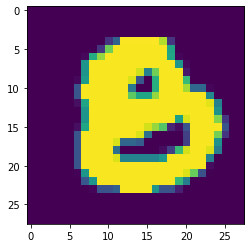

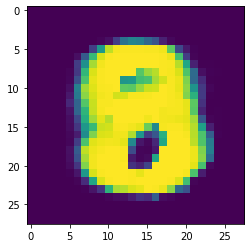

tensor([-2.5197e-08,  7.3789e-08, -2.4514e-07], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([-4.0608e-08,  1.0673e-07, -2.4616e-07], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-4.2733e-13,  3.5840e-12, -5.4097e-12], device='cuda:0')
Epoch: [14/30], Batch: [101/235], train accuracy: 0.996094, loss: 0.002452


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

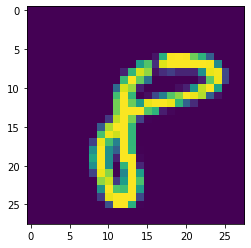

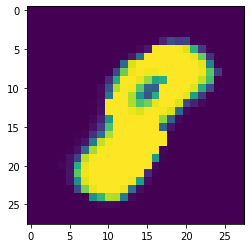

tensor([-7.8892e-08, -6.5457e-07,  1.8118e-06], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([ 1.1608e-07, -8.1368e-07,  1.7518e-06], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 1.4922e-12, -7.5974e-11,  5.1173e-11], device='cuda:0')
Epoch: [14/30], Batch: [201/235], train accuracy: 0.988281, loss: 0.002415


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [14/30], train loss: 0.002460



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [14/30], test accuracy: 0.988000, loss: 0.641168


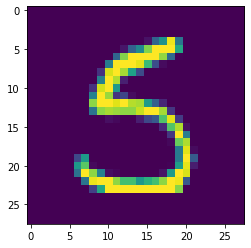

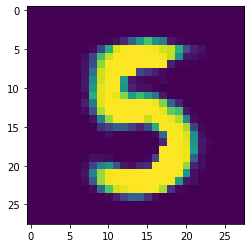

tensor([ 6.1248e-06, -5.5058e-06,  5.0201e-06], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:41,  1.06it/s]

tensor([ 5.5640e-06, -5.2451e-06,  4.1447e-06], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-3.1820e-11,  5.6770e-11, -2.7518e-11], device='cuda:0')
Epoch: [15/30], Batch: [1/235], train accuracy: 0.996094, loss: 0.002459


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

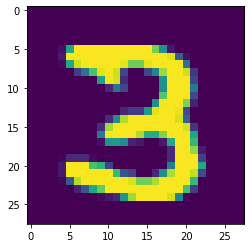

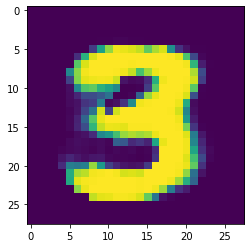

tensor([-8.7232e-08,  6.8546e-07,  4.5978e-06], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([2.2900e-07, 1.8237e-07, 4.2791e-06], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-7.2558e-11,  1.2121e-10, -5.4630e-11], device='cuda:0')
Epoch: [15/30], Batch: [101/235], train accuracy: 0.988281, loss: 0.002508


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

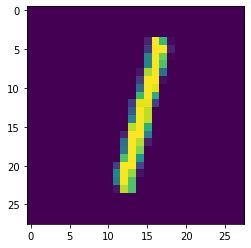

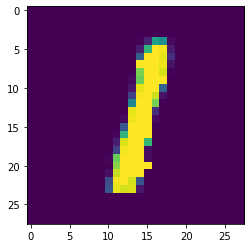

tensor([-1.8298e-08, -5.4158e-08, -1.8654e-07], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([-3.4901e-08, -3.0659e-08, -2.2031e-07], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 1.9016e-12, -5.5097e-12,  5.0905e-12], device='cuda:0')
Epoch: [15/30], Batch: [201/235], train accuracy: 0.996094, loss: 0.002393


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [15/30], train loss: 0.002451



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [15/30], test accuracy: 0.988300, loss: 0.638539


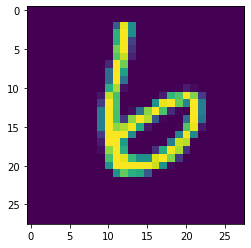

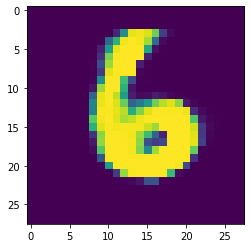

tensor([ 1.3227e-06, -1.8331e-07,  4.1823e-07], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:29,  1.12it/s]

tensor([ 1.1964e-06, -2.2086e-07,  3.1139e-07], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-6.8182e-13, -2.7163e-11,  2.1939e-11], device='cuda:0')
Epoch: [16/30], Batch: [1/235], train accuracy: 0.992188, loss: 0.002447


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

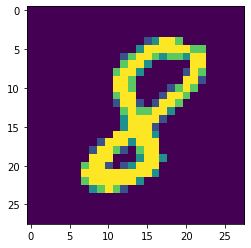

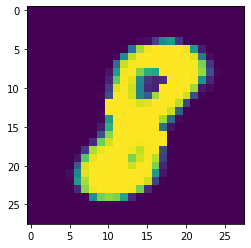

tensor([ 2.0888e-06, -8.8766e-07,  1.2361e-06], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([ 2.2188e-06, -8.9859e-07,  9.3794e-07], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-9.0085e-11,  6.1919e-11, -6.2182e-11], device='cuda:0')
Epoch: [16/30], Batch: [101/235], train accuracy: 0.996094, loss: 0.002416


 85%|████████▌ | 200/235 [01:53<00:19,  1.76it/s]

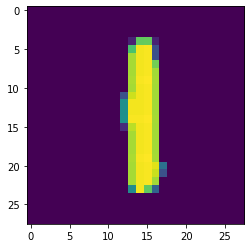

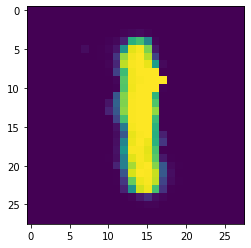

tensor([ 1.0756e-07, -1.7928e-07, -2.5344e-06], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([ 2.7311e-07,  1.8137e-07, -2.9627e-06], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-9.1923e-12, -8.8498e-11,  6.1066e-11], device='cuda:0')
Epoch: [16/30], Batch: [201/235], train accuracy: 0.992188, loss: 0.002474


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [16/30], train loss: 0.002444



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [16/30], test accuracy: 0.988000, loss: 0.638100


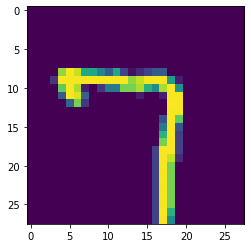

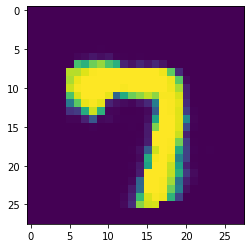

tensor([ 6.2259e-06, -9.4239e-06,  6.2464e-06], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:40,  1.06it/s]

tensor([ 4.9583e-06, -8.8333e-06,  4.6794e-06], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-4.4994e-10,  5.5929e-10, -2.8422e-10], device='cuda:0')
Epoch: [17/30], Batch: [1/235], train accuracy: 0.992188, loss: 0.002439


 43%|████▎     | 100/235 [00:57<01:16,  1.76it/s]

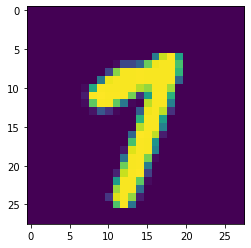

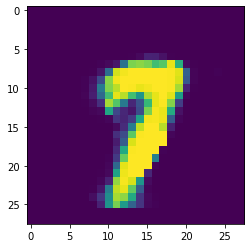

tensor([2.2862e-04, 6.0261e-04, 3.0224e-05], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([0.0004, 0.0007, 0.0002], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 5.4941e-09,  4.8244e-08, -5.2988e-08], device='cuda:0')
Epoch: [17/30], Batch: [101/235], train accuracy: 0.988281, loss: 0.002465


 85%|████████▌ | 200/235 [01:54<00:19,  1.77it/s]

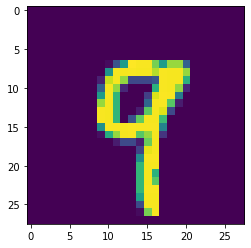

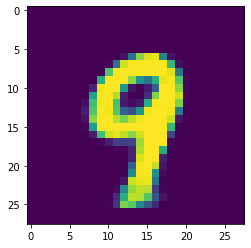

tensor([0.0008, 0.0018, 0.0012], device='cuda:0', grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([-0.0032,  0.0063, -0.0042], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([-2.8875e-08,  2.2221e-07,  1.8031e-07], device='cuda:0')
Epoch: [17/30], Batch: [201/235], train accuracy: 0.988281, loss: 0.002478


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [17/30], train loss: 0.002437



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [17/30], test accuracy: 0.989100, loss: 0.634611


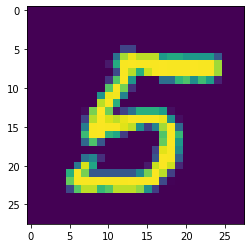

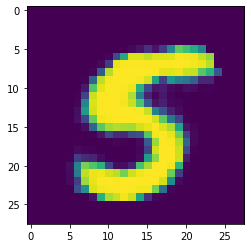

tensor([ 0.0370, -0.0586, -0.0012], device='cuda:0', grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:27,  1.13it/s]

tensor([ 0.0346, -0.0531, -0.0077], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 1.1190e-06, -1.6999e-06,  1.0951e-06], device='cuda:0')
Epoch: [18/30], Batch: [1/235], train accuracy: 0.984375, loss: 0.002442


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

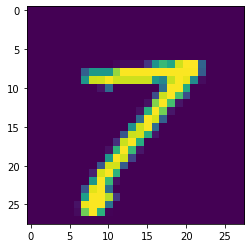

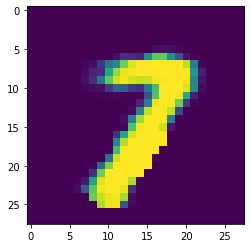

tensor([ 6.4382e-04, -2.9039e-04, -6.0109e-05], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([ 6.4117e-04, -3.4974e-04,  3.7224e-06], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 3.0272e-09, -6.7024e-09,  4.4061e-09], device='cuda:0')
Epoch: [18/30], Batch: [101/235], train accuracy: 0.996094, loss: 0.002382


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

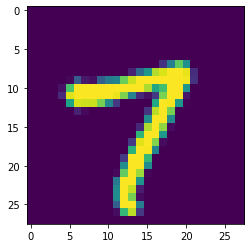

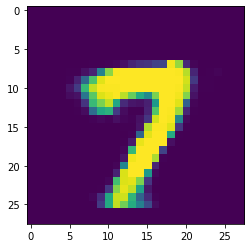

tensor([-1.1569e-05,  3.9945e-06,  6.0478e-06], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([-1.0742e-05,  2.1583e-06,  5.7505e-06], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-7.3861e-10,  9.4673e-10, -4.0406e-10], device='cuda:0')
Epoch: [18/30], Batch: [201/235], train accuracy: 0.996094, loss: 0.002373


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [18/30], train loss: 0.002428



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [18/30], test accuracy: 0.987900, loss: 0.634137


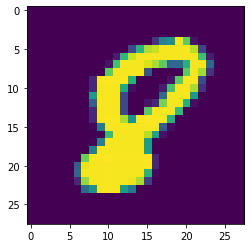

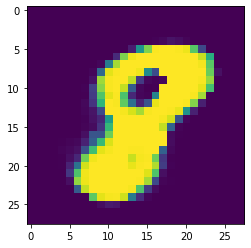

tensor([2.6326e-07, 2.4086e-06, 3.2010e-07], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:39,  1.07it/s]

tensor([1.1954e-07, 2.6040e-06, 5.7151e-07], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 1.8025e-11,  6.6746e-12, -6.0256e-11], device='cuda:0')
Epoch: [19/30], Batch: [1/235], train accuracy: 0.988281, loss: 0.002478


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

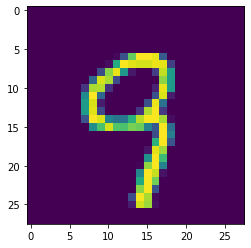

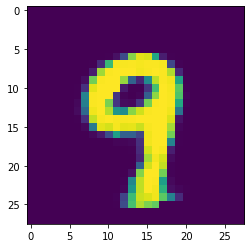

tensor([-5.9067e-07,  6.3875e-07, -7.2953e-08], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:23,  1.60it/s]

tensor([-4.3347e-07,  5.5381e-07, -3.3569e-08], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-8.1215e-11,  1.2594e-10, -5.1803e-11], device='cuda:0')
Epoch: [19/30], Batch: [101/235], train accuracy: 0.992188, loss: 0.002427


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

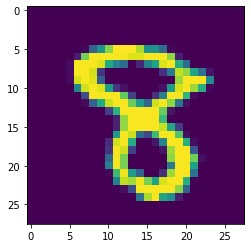

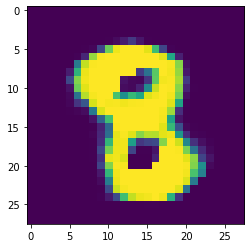

tensor([-2.4577e-07,  4.9249e-07, -1.1632e-07], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.60it/s]

tensor([-2.6386e-07,  4.4820e-07, -7.5310e-08], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-6.0702e-12,  9.9975e-12, -3.5474e-12], device='cuda:0')
Epoch: [19/30], Batch: [201/235], train accuracy: 0.988281, loss: 0.002452


100%|██████████| 235/235 [02:13<00:00,  1.77it/s]

Epoch: [19/30], train loss: 0.002419



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [19/30], test accuracy: 0.987800, loss: 0.632978


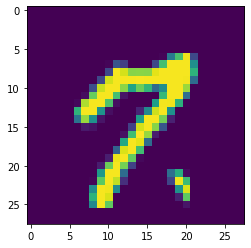

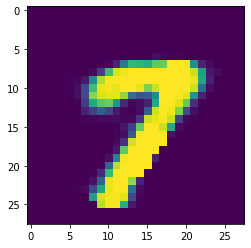

tensor([ 6.1144e-08,  2.0082e-07, -3.3978e-07], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:27,  1.13it/s]

tensor([ 1.3164e-07,  1.7078e-07, -2.8295e-07], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-3.1634e-11,  1.3022e-11,  6.4876e-12], device='cuda:0')
Epoch: [20/30], Batch: [1/235], train accuracy: 0.996094, loss: 0.002359


 43%|████▎     | 100/235 [00:57<01:16,  1.76it/s]

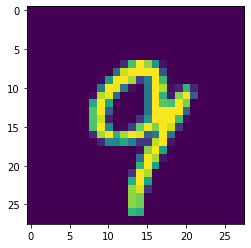

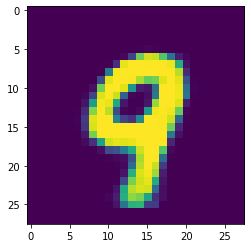

tensor([ 9.2753e-08, -2.2007e-07,  1.8975e-07], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([ 9.3044e-08, -2.0908e-07,  1.6531e-07], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 1.4605e-12, -4.0428e-12,  1.1461e-12], device='cuda:0')
Epoch: [20/30], Batch: [101/235], train accuracy: 0.996094, loss: 0.002431


 85%|████████▌ | 200/235 [01:53<00:19,  1.76it/s]

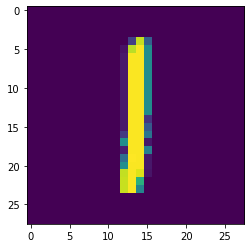

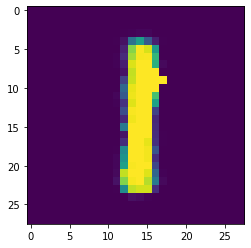

tensor([-2.9483e-07, -1.3981e-07, -3.0752e-07], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([-3.6914e-07, -6.8209e-08, -3.3790e-07], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-1.0898e-12,  4.9467e-12, -4.7896e-12], device='cuda:0')
Epoch: [20/30], Batch: [201/235], train accuracy: 0.984375, loss: 0.002426


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [20/30], train loss: 0.002415



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [20/30], test accuracy: 0.988500, loss: 0.631367


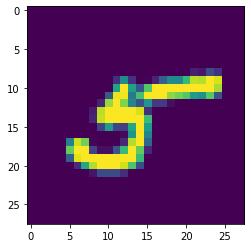

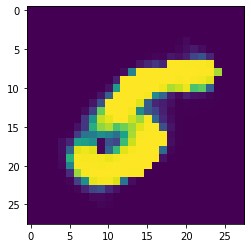

tensor([-1.6632e-08, -5.9300e-08, -8.9944e-08], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:39,  1.07it/s]

tensor([-2.9791e-08, -5.9820e-08, -9.7100e-08], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-2.6651e-13, -9.2333e-12,  8.0783e-12], device='cuda:0')
Epoch: [21/30], Batch: [1/235], train accuracy: 1.000000, loss: 0.002449


 43%|████▎     | 100/235 [00:56<01:15,  1.78it/s]

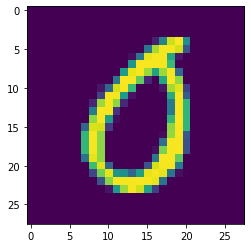

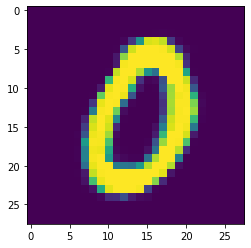

tensor([-2.8276e-10, -1.4383e-09, -1.1597e-10], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:23,  1.60it/s]

tensor([-4.1047e-09,  1.0277e-09, -3.4129e-09], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 4.5297e-13, -1.2411e-13, -3.3940e-14], device='cuda:0')
Epoch: [21/30], Batch: [101/235], train accuracy: 0.992188, loss: 0.002403


 85%|████████▌ | 200/235 [01:53<00:19,  1.78it/s]

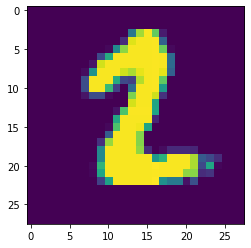

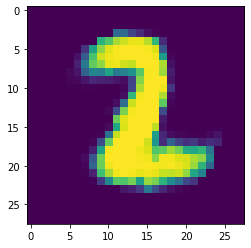

tensor([ 3.9818e-09,  6.7651e-10, -1.6786e-10], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.60it/s]

tensor([ 4.8036e-09, -4.2373e-10,  1.4076e-09], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 4.6384e-13, -4.3250e-13,  5.3519e-13], device='cuda:0')
Epoch: [21/30], Batch: [201/235], train accuracy: 0.988281, loss: 0.002422


100%|██████████| 235/235 [02:12<00:00,  1.77it/s]

Epoch: [21/30], train loss: 0.002410



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [21/30], test accuracy: 0.988600, loss: 0.632003


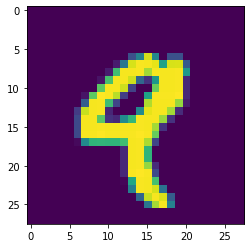

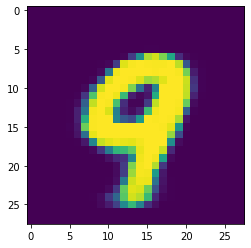

tensor([-7.0573e-10,  2.0696e-09, -3.1249e-09], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:29,  1.12it/s]

tensor([-6.6924e-10,  2.1527e-09, -2.9441e-09], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 1.9247e-13, -2.0287e-13,  1.6192e-13], device='cuda:0')
Epoch: [22/30], Batch: [1/235], train accuracy: 0.996094, loss: 0.002425


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

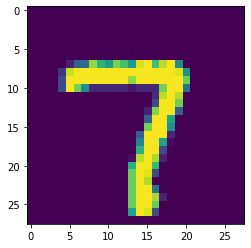

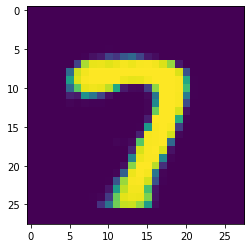

tensor([-2.0149e-11,  7.5160e-10, -1.6241e-10], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:23,  1.60it/s]

tensor([-1.7196e-10,  8.6129e-10, -3.2084e-10], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 9.2281e-14,  4.6046e-14, -3.3895e-14], device='cuda:0')
Epoch: [22/30], Batch: [101/235], train accuracy: 0.992188, loss: 0.002385


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

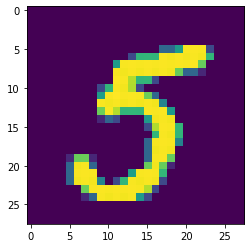

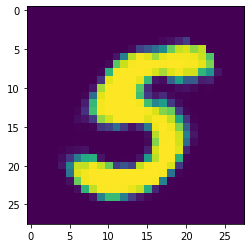

tensor([-8.7292e-09,  6.2517e-09, -1.0335e-08], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([-7.9823e-09,  6.7303e-09, -9.0087e-09], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-5.1348e-13,  5.4487e-13, -1.8882e-13], device='cuda:0')
Epoch: [22/30], Batch: [201/235], train accuracy: 0.996094, loss: 0.002393


100%|██████████| 235/235 [02:13<00:00,  1.77it/s]

Epoch: [22/30], train loss: 0.002401



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [22/30], test accuracy: 0.990100, loss: 0.629075


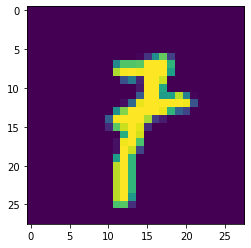

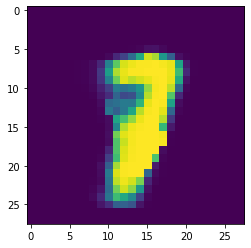

tensor([-2.9279e-08,  1.0252e-08, -1.9588e-08], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:40,  1.06it/s]

tensor([-2.7578e-08,  9.0193e-09, -1.7602e-08], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-6.8498e-12,  8.8497e-12, -5.3738e-12], device='cuda:0')
Epoch: [23/30], Batch: [1/235], train accuracy: 1.000000, loss: 0.002359


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

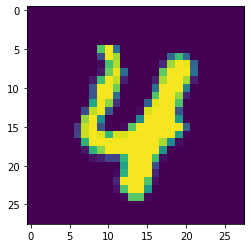

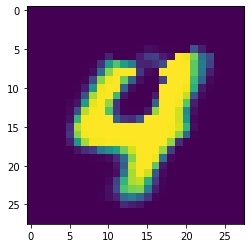

tensor([-1.9734e-08,  5.3130e-09, -1.6671e-08], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([-2.0332e-08,  6.4555e-09, -1.7318e-08], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 1.8659e-12, -1.4714e-12,  7.9837e-13], device='cuda:0')
Epoch: [23/30], Batch: [101/235], train accuracy: 1.000000, loss: 0.002461


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

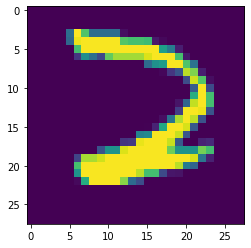

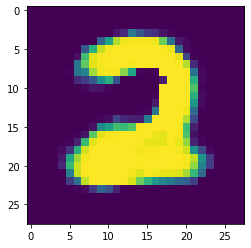

tensor([ 9.5180e-11, -1.3898e-09,  6.1318e-09], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([ 1.6396e-09, -3.2627e-09,  8.1143e-09], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-2.3175e-13,  2.7264e-13, -8.2175e-14], device='cuda:0')
Epoch: [23/30], Batch: [201/235], train accuracy: 0.996094, loss: 0.002397


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [23/30], train loss: 0.002392



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [23/30], test accuracy: 0.989200, loss: 0.625099


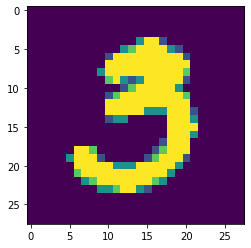

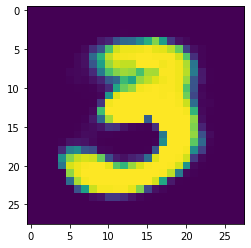

tensor([-5.1867e-09,  3.0828e-09, -1.0747e-08], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:26,  1.13it/s]

tensor([-1.4076e-08,  2.5874e-08, -3.3528e-08], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 8.7345e-12, -3.3233e-11,  2.1400e-11], device='cuda:0')
Epoch: [24/30], Batch: [1/235], train accuracy: 0.992188, loss: 0.002384


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

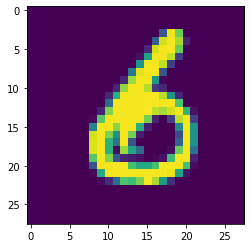

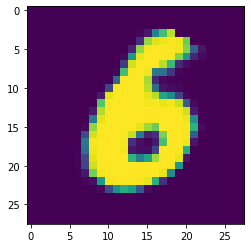

tensor([ 4.5916e-07, -2.8870e-07, -4.5908e-07], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([ 5.4110e-07, -2.9914e-07, -4.4831e-07], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-3.6281e-11,  4.9679e-11, -3.2898e-11], device='cuda:0')
Epoch: [24/30], Batch: [101/235], train accuracy: 0.996094, loss: 0.002359


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

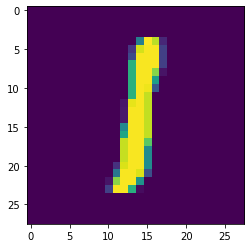

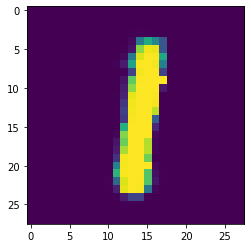

tensor([ 1.0382e-05, -1.1525e-05, -6.7306e-06], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.60it/s]

tensor([ 1.3131e-05, -9.8801e-06, -5.3839e-06], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-2.6877e-10,  9.5619e-10, -1.0537e-09], device='cuda:0')
Epoch: [24/30], Batch: [201/235], train accuracy: 0.988281, loss: 0.002382


100%|██████████| 235/235 [02:13<00:00,  1.77it/s]

Epoch: [24/30], train loss: 0.002388



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [24/30], test accuracy: 0.986900, loss: 0.629914


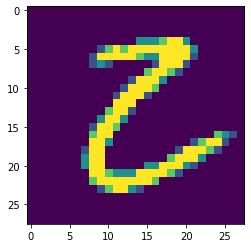

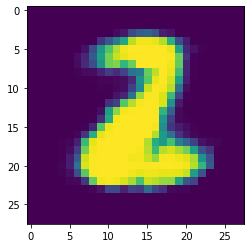

tensor([ 6.0643e-05, -7.7596e-06, -1.6390e-05], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:40,  1.06it/s]

tensor([ 1.2229e-04, -4.1148e-05, -3.8758e-06], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 2.0300e-09, -3.6086e-09,  3.7905e-09], device='cuda:0')
Epoch: [25/30], Batch: [1/235], train accuracy: 0.996094, loss: 0.002387


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

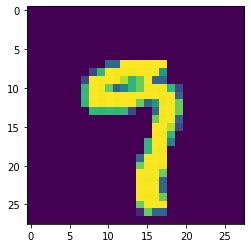

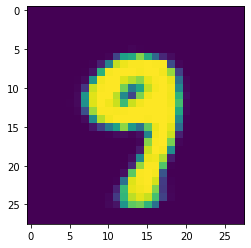

tensor([-0.0016,  0.0020, -0.0048], device='cuda:0', grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([-0.0022,  0.0021, -0.0048], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 1.9125e-07, -9.3925e-08,  2.1257e-07], device='cuda:0')
Epoch: [25/30], Batch: [101/235], train accuracy: 0.984375, loss: 0.002364


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

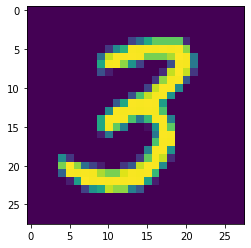

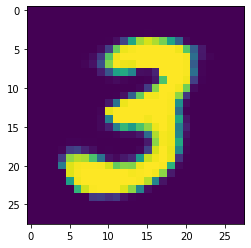

tensor([-0.0002,  0.0004, -0.0005], device='cuda:0', grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([ 0.0002,  0.0003, -0.0004], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 2.9215e-08, -2.4369e-08,  2.3526e-08], device='cuda:0')
Epoch: [25/30], Batch: [201/235], train accuracy: 1.000000, loss: 0.002360


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [25/30], train loss: 0.002383



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [25/30], test accuracy: 0.988600, loss: 0.626422


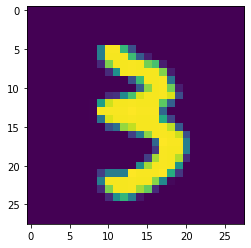

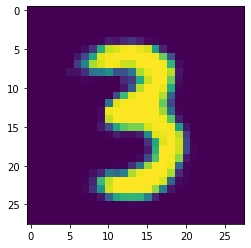

tensor([ 4.3668e-04, -1.3101e-04,  9.6114e-05], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:29,  1.12it/s]

tensor([ 0.0004, -0.0001,  0.0001], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 2.6329e-09, -1.2800e-08,  1.0103e-08], device='cuda:0')
Epoch: [26/30], Batch: [1/235], train accuracy: 1.000000, loss: 0.002351


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

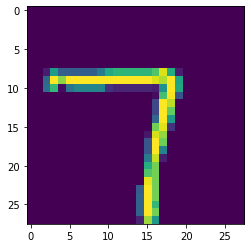

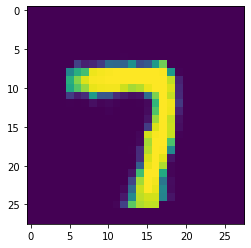

tensor([ 5.4978e-05, -1.9187e-04, -3.9792e-05], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([ 1.2687e-05, -1.7147e-04, -7.9202e-05], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-6.2755e-09,  7.1800e-09, -6.0189e-09], device='cuda:0')
Epoch: [26/30], Batch: [101/235], train accuracy: 0.996094, loss: 0.002349


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

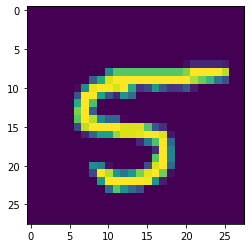

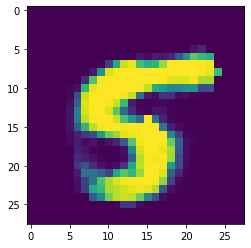

tensor([9.8863e-05, 2.2899e-05, 4.9646e-06], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([ 1.1401e-04, -1.0899e-06,  3.3418e-05], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 1.4277e-09,  2.7704e-09, -7.6957e-09], device='cuda:0')
Epoch: [26/30], Batch: [201/235], train accuracy: 0.996094, loss: 0.002357


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [26/30], train loss: 0.002378



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [26/30], test accuracy: 0.989000, loss: 0.622662


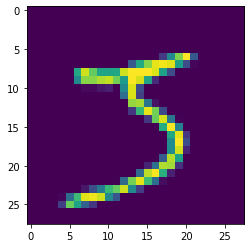

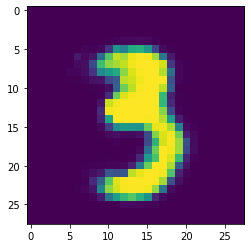

tensor([-5.9998e-05,  3.5035e-07, -5.8982e-05], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:41,  1.06it/s]

tensor([-1.2682e-04,  7.1048e-05, -1.1867e-04], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([ 5.1813e-09, -1.7489e-08,  1.5511e-08], device='cuda:0')
Epoch: [27/30], Batch: [1/235], train accuracy: 0.996094, loss: 0.002346


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

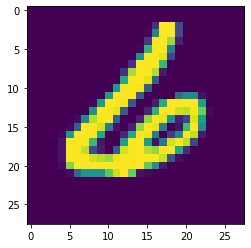

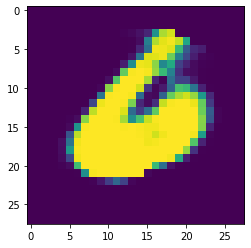

tensor([ 2.7630e-05, -4.1564e-04,  3.2444e-04], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:23,  1.60it/s]

tensor([-0.0001, -0.0003,  0.0003], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([-2.0163e-08, -3.2980e-09,  1.8812e-08], device='cuda:0')
Epoch: [27/30], Batch: [101/235], train accuracy: 0.992188, loss: 0.002413


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

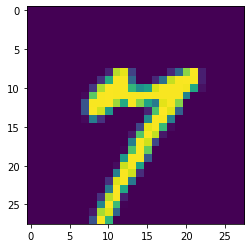

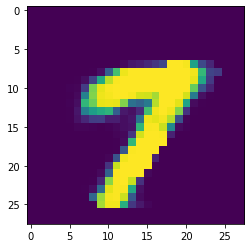

tensor([0.0027, 0.0005, 0.0013], device='cuda:0', grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.60it/s]

tensor([0.0024, 0.0003, 0.0010], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 1.8891e-08, -5.7459e-08,  4.3300e-08], device='cuda:0')
Epoch: [27/30], Batch: [201/235], train accuracy: 0.992188, loss: 0.002380


100%|██████████| 235/235 [02:13<00:00,  1.77it/s]

Epoch: [27/30], train loss: 0.002369



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [27/30], test accuracy: 0.989800, loss: 0.621882


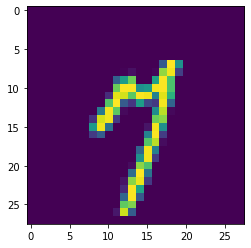

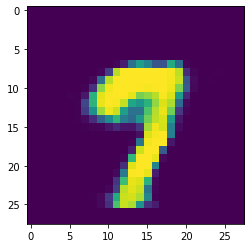

tensor([-0.0019, -0.0072,  0.0084], device='cuda:0', grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:28,  1.12it/s]

tensor([ 0.0013, -0.0103,  0.0114], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([-3.6266e-07,  4.9472e-07, -2.6811e-07], device='cuda:0')
Epoch: [28/30], Batch: [1/235], train accuracy: 1.000000, loss: 0.002359


 43%|████▎     | 100/235 [00:56<01:16,  1.77it/s]

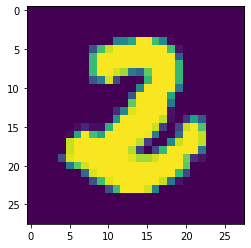

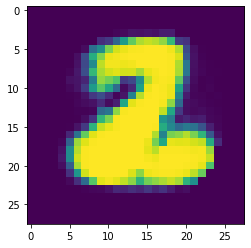

tensor([-0.0884,  0.0663, -0.0105], device='cuda:0', grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([-0.0948,  0.0679, -0.0123], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 7.9635e-06, -1.0563e-05,  8.6364e-06], device='cuda:0')
Epoch: [28/30], Batch: [101/235], train accuracy: 0.988281, loss: 0.002338


 85%|████████▌ | 200/235 [01:53<00:19,  1.77it/s]

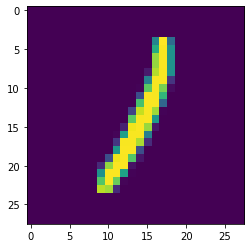

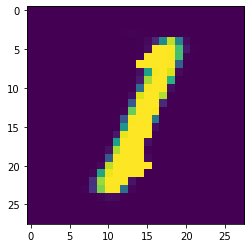

tensor([-0.0009, -0.0002,  0.0006], device='cuda:0', grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([-9.3386e-04,  1.3410e-05,  5.1371e-04], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-4.3037e-09,  1.9668e-09, -7.1842e-09], device='cuda:0')
Epoch: [28/30], Batch: [201/235], train accuracy: 1.000000, loss: 0.002314


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [28/30], train loss: 0.002367



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [28/30], test accuracy: 0.989700, loss: 0.622083


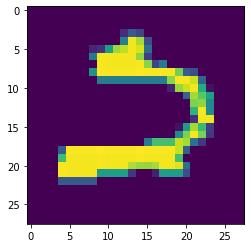

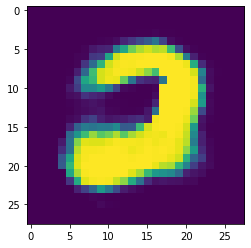

tensor([-0.0018, -0.0003,  0.0015], device='cuda:0', grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:41,  1.06it/s]

tensor([-0.0015, -0.0002,  0.0021], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([-2.0518e-07,  1.1170e-07, -2.3835e-08], device='cuda:0')
Epoch: [29/30], Batch: [1/235], train accuracy: 0.992188, loss: 0.002371


 43%|████▎     | 100/235 [00:56<01:16,  1.76it/s]

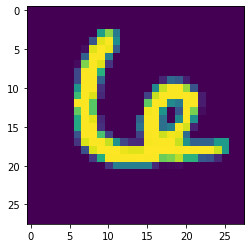

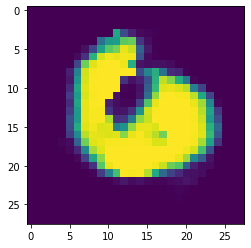

tensor([ 0.0002, -0.0002,  0.0003], device='cuda:0', grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([ 0.0002, -0.0003,  0.0003], device='cuda:0', grad_fn=<SliceBackward>)
the grads are tensor([ 7.7507e-09, -6.5830e-09,  4.3612e-09], device='cuda:0')
Epoch: [29/30], Batch: [101/235], train accuracy: 0.992188, loss: 0.002433


 85%|████████▌ | 200/235 [01:53<00:19,  1.76it/s]

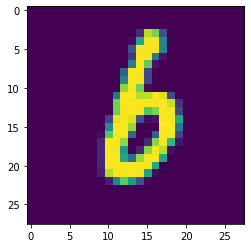

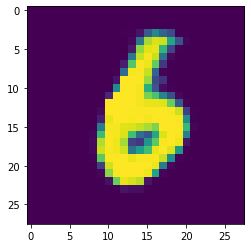

tensor([-2.3729e-06, -2.1005e-05,  1.7299e-05], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([ 1.6779e-06, -2.3359e-05,  1.7917e-05], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-1.9859e-09,  1.1325e-09, -9.3776e-11], device='cuda:0')
Epoch: [29/30], Batch: [201/235], train accuracy: 0.996094, loss: 0.002331


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [29/30], train loss: 0.002361



  0%|          | 0/235 [00:00<?, ?it/s]

Epoch: [29/30], test accuracy: 0.988700, loss: 0.622147


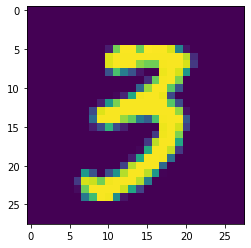

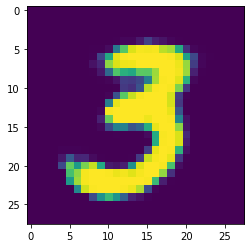

tensor([ 2.6504e-05, -3.7160e-05,  2.7075e-05], device='cuda:0',
       grad_fn=<SliceBackward>)


  0%|          | 1/235 [00:00<03:28,  1.12it/s]

tensor([ 2.4369e-05, -3.3722e-05,  2.4457e-05], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-4.4556e-10, -4.4486e-10,  9.7308e-10], device='cuda:0')
Epoch: [30/30], Batch: [1/235], train accuracy: 0.996094, loss: 0.002347


 43%|████▎     | 100/235 [00:57<01:16,  1.76it/s]

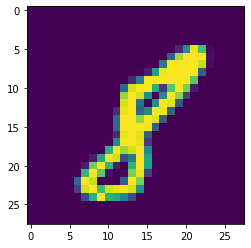

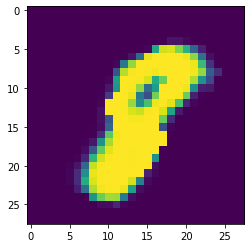

tensor([-3.0873e-06,  8.4881e-06, -2.5425e-06], device='cuda:0',
       grad_fn=<SliceBackward>)


 43%|████▎     | 101/235 [00:57<01:24,  1.59it/s]

tensor([-2.9214e-06,  9.2511e-06, -2.8381e-06], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-5.4865e-11, -1.2333e-10,  8.1362e-11], device='cuda:0')
Epoch: [30/30], Batch: [101/235], train accuracy: 1.000000, loss: 0.002307


 85%|████████▌ | 200/235 [01:54<00:19,  1.76it/s]

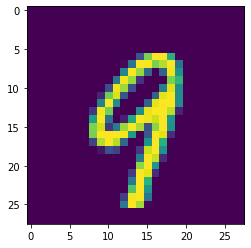

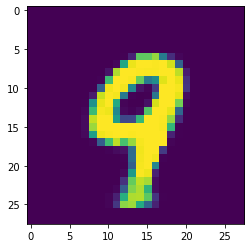

tensor([ 2.0728e-06,  1.7929e-06, -2.2497e-07], device='cuda:0',
       grad_fn=<SliceBackward>)


 86%|████████▌ | 201/235 [01:54<00:21,  1.59it/s]

tensor([2.1274e-06, 1.4458e-06, 4.6197e-07], device='cuda:0',
       grad_fn=<SliceBackward>)
the grads are tensor([-1.7192e-10,  1.6358e-10, -1.2468e-10], device='cuda:0')
Epoch: [30/30], Batch: [201/235], train accuracy: 0.996094, loss: 0.002305


100%|██████████| 235/235 [02:13<00:00,  1.76it/s]

Epoch: [30/30], train loss: 0.002358


Epoch: [30/30], test accuracy: 0.989800, loss: 0.620377


In [10]:
optimizer_recon = torch.optim.Adam(net.decoder.parameters(), lr=args['LEARNING_RATE_2'], weight_decay=args['WEIGHTDECAY'])
optimizer_class = torch.optim.Adam([
                {'params': net.conv_layer.parameters()},
                {'params': net.primary_capsules.parameters()},
                {'params': net.digit_capsules_1.parameters()},
                {'params': net.digit_capsules_2.parameters()},
            ], lr=args['LEARNING_RATE_1'])


def imshow(img):
#     img = img * 0.3081 + 0.1307     # unnormalize
    npimg = img.detach().cpu().numpy()
#     plt.imshow(np.transpose(npimg)#, (1, 2, 0)))
    plt.imshow(npimg)
    plt.show()

def train_CapsNet(model, optimizer_class, optimizer_recon, train_loader, epoch, args):
    capsule_net = model
    capsule_net.train()
    n_batch = len(train_loader)
    total_loss = 0
    for batch_id, (data, target) in enumerate(tqdm(train_loader)):
        target = torch.sparse.torch.eye(10).index_select(dim=0, index=target)
        if(args['USE_CUDA']):
            data, target = data.cuda(), target.cuda()

        optimizer_class.zero_grad()
        optimizer_recon.zero_grad()
        output, reconstructions, masked = capsule_net(data)
        loss = capsule_net.loss(data, output, target, reconstructions)
        if(batch_id%100==0):
            img1 = data[0].reshape(28,28)
            img2 = reconstructions[0].reshape(28, 28)
            imshow(img1)
            imshow(img2)
            print(capsule_net.decoder.reconstraction_layers[0].weight[0][:3])
        loss.backward()
        optimizer_class.step()
        optimizer_recon.step()
        if(batch_id%100==0):
            print(capsule_net.decoder.reconstraction_layers[0].weight[0][:3])
            print("the grads are", capsule_net.decoder.reconstraction_layers[0].weight.grad[0][:3].data)
        correct = torch.sum(torch.argmax(masked, 1) == torch.argmax(target, 1))
        train_loss = loss.item()
        total_loss += train_loss
        if batch_id % 100 == 0:
            tqdm.write("Epoch: [{}/{}], Batch: [{}/{}], train accuracy: {:.6f}, loss: {:.6f}".format(
                epoch,
                args['N_EPOCHS'],
                batch_id + 1,
                n_batch,
                correct / float(args['BATCH_SIZE']),
                train_loss / float(args['BATCH_SIZE'])
                ))
    tqdm.write('Epoch: [{}/{}], train loss: {:.6f}'.format(epoch,args['N_EPOCHS'],total_loss / len(train_loader.dataset)))
    
def test_CapsNet(capsule_net, test_loader, epoch, args):
    capsule_net.eval()
    test_loss = 0
    correct = 0
    for batch_id, (data, target) in enumerate(test_loader):

        target = torch.sparse.torch.eye(10).index_select(dim=0, index=target)
        if args['USE_CUDA']:
            data, target = data.cuda(), target.cuda()

        output, reconstructions, masked = capsule_net(data)
        loss = capsule_net.loss(data, output, target, reconstructions)

        test_loss += loss.item()
        correct += torch.sum(torch.argmax(masked, 1) == torch.argmax(target, 1))

    tqdm.write(
        "Epoch: [{}/{}], test accuracy: {:.6f}, loss: {:.6f}".format(epoch, args['N_EPOCHS'], correct / len(test_loader.dataset),
                                                                  test_loss / len(test_loader)))

for e in range(1, args['N_EPOCHS'] + 1):
    train_CapsNet(net, optimizer_class, optimizer_recon, trainloader, e, args)
    test_CapsNet(net, testloader, e, args)

In [11]:
torch.save(net.state_dict(), "./CapsNetMNIST_Recon_model2_iter2.pth")

In [6]:
for param in net.parameters():
    if(param.requires_grad==True):
        print(param.shape)

torch.Size([12, 1, 15, 15])
torch.Size([12])
torch.Size([16, 12, 8, 8])
torch.Size([16])
torch.Size([1, 784, 49, 16, 1])
torch.Size([1, 49, 10, 16, 16])
torch.Size([512, 160])
torch.Size([512])
torch.Size([1024, 512])
torch.Size([1024])
torch.Size([784, 1024])
torch.Size([784])


In [ ]:
for p in net.parameters():
    

In [47]:
a = torch.randn((3, 160))
print(a)
a.reshape(a.size(0), 10, 16)

tensor([[ 5.1325e-01, -1.0302e+00,  4.9605e-03, -6.9020e-01, -1.3553e-01,
          7.6326e-01,  1.2116e+00, -4.1136e-01, -1.4934e+00,  9.4783e-01,
         -3.0231e-02, -5.1155e-01,  5.6447e-01,  1.0313e+00, -5.6326e-02,
         -8.6653e-01,  8.6762e-01,  5.1870e-01,  6.3838e-02, -2.7219e-02,
          8.4192e-01,  1.4231e-01,  1.2893e+00,  2.2664e-01,  6.5010e-01,
          9.1107e-02, -3.2898e-02,  8.7398e-01,  1.2721e+00, -4.8957e-03,
         -5.1441e-01,  9.7582e-01,  9.1093e-01, -1.1489e-01, -9.2666e-01,
         -8.1681e-02,  4.7111e-02, -9.1563e-01, -1.8584e-01, -1.1149e+00,
         -8.8968e-01,  4.2792e-01, -2.1250e-01, -4.3697e-01, -5.0146e-01,
          8.8577e-01, -1.9269e-01, -2.0186e+00, -9.1999e-01,  1.2550e+00,
         -1.8695e+00,  8.1325e-01,  3.9804e-01,  5.2380e-01,  9.2027e-01,
          1.2718e+00, -8.5510e-01,  1.5487e+00, -6.4137e-01,  1.1999e+00,
          1.7406e+00, -8.1405e-02, -2.6045e-01, -6.4746e-01,  1.9168e+00,
          1.3339e+00, -1.0120e+00, -1.

tensor([[[ 5.1325e-01, -1.0302e+00,  4.9605e-03, -6.9020e-01, -1.3553e-01,
           7.6326e-01,  1.2116e+00, -4.1136e-01, -1.4934e+00,  9.4783e-01,
          -3.0231e-02, -5.1155e-01,  5.6447e-01,  1.0313e+00, -5.6326e-02,
          -8.6653e-01],
         [ 8.6762e-01,  5.1870e-01,  6.3838e-02, -2.7219e-02,  8.4192e-01,
           1.4231e-01,  1.2893e+00,  2.2664e-01,  6.5010e-01,  9.1107e-02,
          -3.2898e-02,  8.7398e-01,  1.2721e+00, -4.8957e-03, -5.1441e-01,
           9.7582e-01],
         [ 9.1093e-01, -1.1489e-01, -9.2666e-01, -8.1681e-02,  4.7111e-02,
          -9.1563e-01, -1.8584e-01, -1.1149e+00, -8.8968e-01,  4.2792e-01,
          -2.1250e-01, -4.3697e-01, -5.0146e-01,  8.8577e-01, -1.9269e-01,
          -2.0186e+00],
         [-9.1999e-01,  1.2550e+00, -1.8695e+00,  8.1325e-01,  3.9804e-01,
           5.2380e-01,  9.2027e-01,  1.2718e+00, -8.5510e-01,  1.5487e+00,
          -6.4137e-01,  1.1999e+00,  1.7406e+00, -8.1405e-02, -2.6045e-01,
          -6.4746e-01],
    

In [43]:
a = torch.randn((5, 160), requires_grad=True)
print(a.shape)
list_outputs = []
for i in range(10):
    indices = torch.tensor(list(range(i*16,(i+1)*16)))
    b = torch.index_select(a, 1, indices).sum(1)
    list_outputs.append(b.unsqueeze(1))
    
final_output = torch.cat((list_outputs), dim=1)
print(final_output)

torch.Size([5, 160])
tensor([[-2.9808,  6.1379, -2.2743, -8.6797, -2.1349, -4.8229,  1.1374, -2.1496,
         -2.5854, -5.4202],
        [ 1.2475,  2.9074, -1.4996, -1.0073,  4.3370,  2.1401,  4.9757, -7.0598,
         -1.4928,  3.4861],
        [ 0.2703,  2.3794, -2.1370, -5.0002, -0.4818,  8.4345,  0.9741, -0.9550,
          1.4761, -0.8609],
        [ 1.9910,  5.3881, -3.3258, -0.5479,  1.0195, -3.0735,  1.4131, -2.4274,
         -4.2224, -5.3099],
        [-5.4063, -0.6611,  3.8889, -2.3977, -0.7572, -1.7452, -0.4238,  1.9451,
          5.3185, -2.4230]], grad_fn=<CatBackward>)


In [44]:
sume = final_output.sum()
sume.backward()
a.grad

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1.

In [ ]:
# #Config for 49 16d vectors in the Primary Capsule. Set Softmax dimension to 1 in this case
# class Config:
#     def __init__(self):
#         # CNN (cnn)
#         self.cnn_in_channels = 1
#         self.cnn_out_channels = 12
#         self.cnn_kernel_size = 15

#         # Primary Capsule (pc)
#         self.pc_num_capsules = 16
#         self.pc_in_channels = 12
#         self.pc_out_channels = 1
#         self.pc_kernel_size = 8
#         self.pc_num_routes = 1 * 7 * 7

#         # Digit Capsule 1 (dc)
#         self.dc_num_capsules = 49
#         self.dc_num_routes = 1 * 7 * 7
#         self.dc_in_channels = 16
#         self.dc_out_channels = 16
        
#         # Digit Capsule 2 (dc)
#         self.dc_2_num_capsules = 10
#         self.dc_2_num_routes = 1 * 7 * 7
#         self.dc_2_in_channels = 16
#         self.dc_2_out_channels = 16

#         # Decoder
#         self.input_width = 28
#         self.input_height = 28

In [ ]:
# # Config for 16 1d vectors in Capsule Layer. Set the Softmax Dimension to 1 in this case
# class Config:
#     def __init__(self, dataset='mnist'):
#         # CNN (cnn)
#         self.cnn_in_channels = 1
#         self.cnn_out_channels = 12
#         self.cnn_kernel_size = 15

#         # Primary Capsule (pc)
#         self.pc_num_capsules = 1
#         self.pc_in_channels = 12
#         self.pc_out_channels = 16
#         self.pc_kernel_size = 8
#         self.pc_num_routes = 16 * 7 * 7

#         # Digit Capsule 1 (dc)
#         self.dc_num_capsules = 49
#         self.dc_num_routes = 16 * 7 * 7
#         self.dc_in_channels = 1
#         self.dc_out_channels = 16 #1
        
#         # Digit Capsule 2 (dc)
#         self.dc_2_num_capsules = 10
#         self.dc_2_num_routes = 7 * 7
#         self.dc_2_in_channels = 16 #1
#         self.dc_2_out_channels = 16

#         # Decoder
#         self.input_width = 28
#         self.input_height = 28